In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


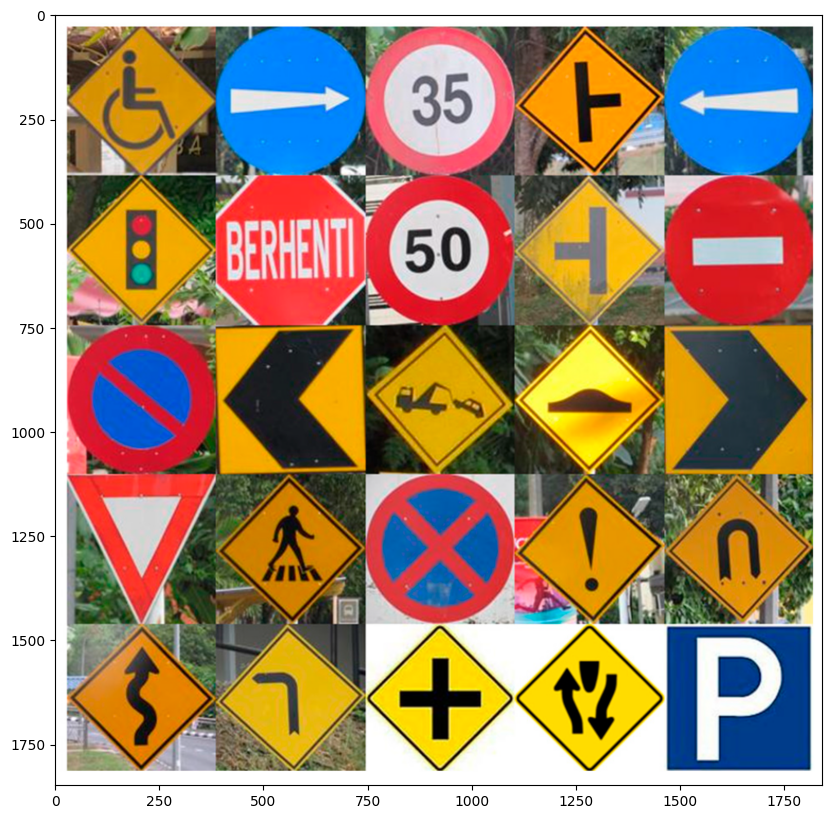

In [4]:
image = cv2.imread("res/lab5_2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

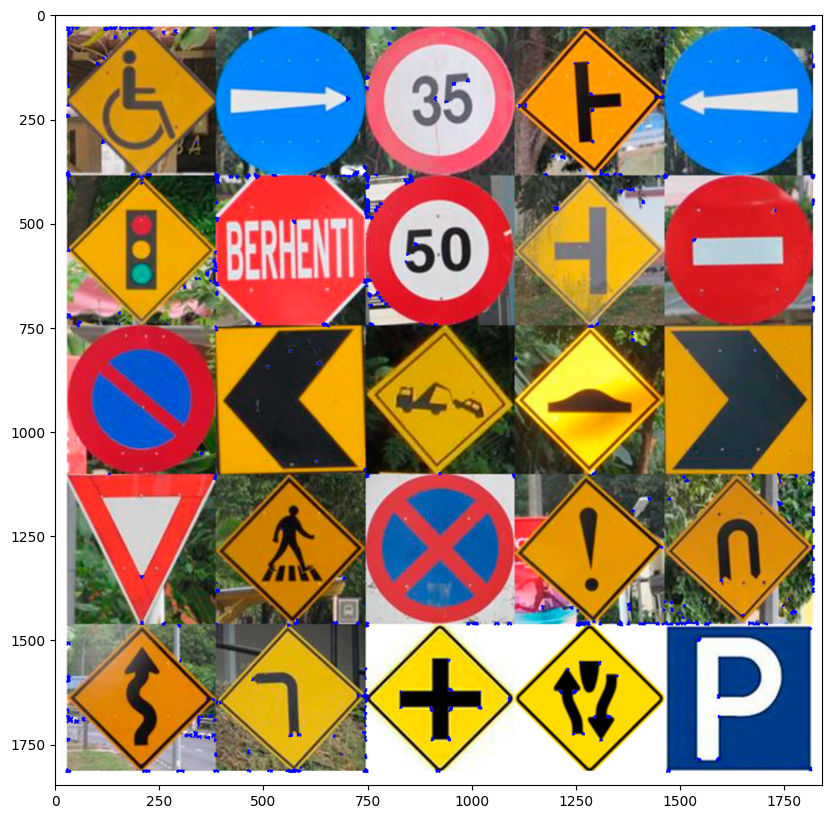

In [7]:
image_h = image
harris = cv2.cvtColor(image_h, cv2.COLOR_RGB2GRAY)
harris = np.float32(harris)
dest = cv2.cornerHarris(harris, 2, 3, 0.04)
dest = cv2.dilate(dest, None)
image_h[dest > 0.01 * dest.max()] = [0, 0, 255]
plt.imshow(image_h)


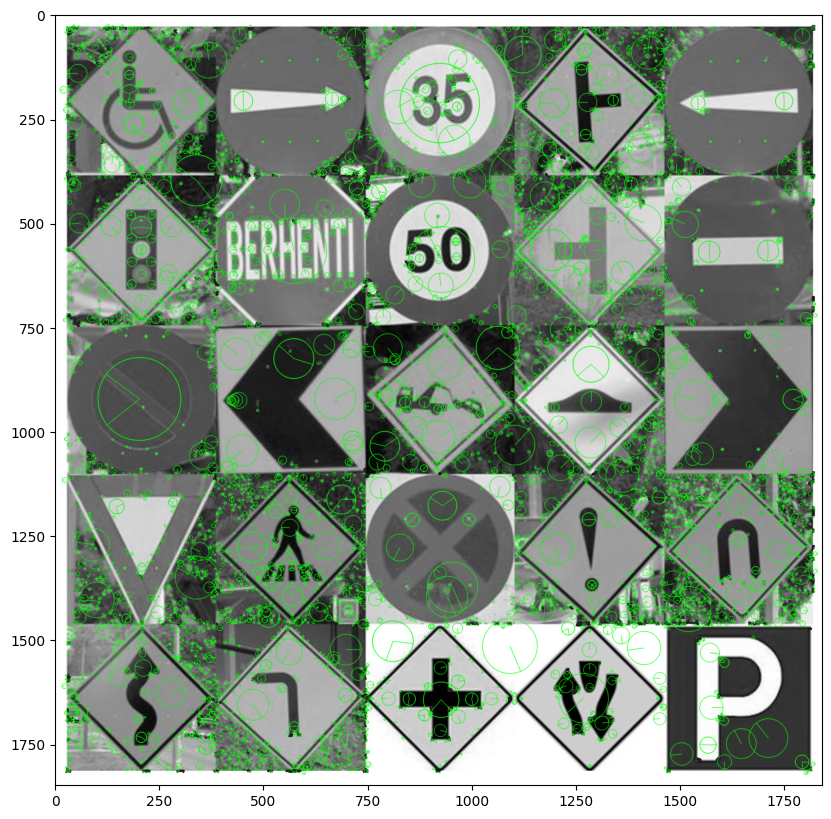

In [8]:
# SIFT
image_s = image

# Converting image to grayscale
gray = cv2.cvtColor(image_s, cv2.COLOR_RGB2GRAY)

# Applying SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

# Marking the keypoint on the image using circles
image_s = cv2.drawKeypoints(
    gray, kp, image_s, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.imshow(image_s)


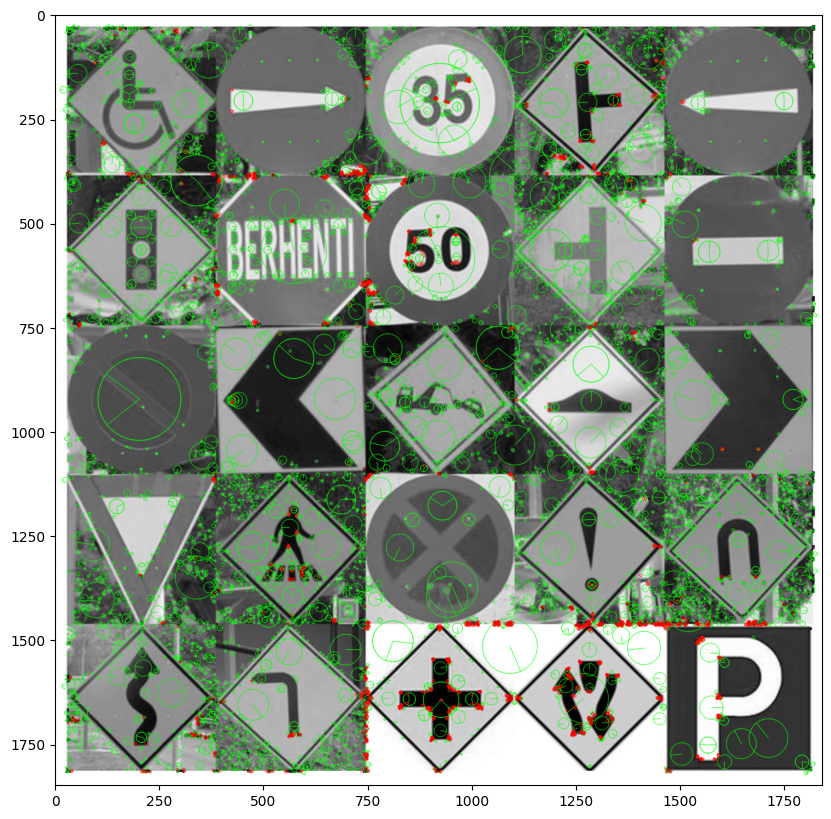

In [9]:
# ORB detectAndCompute w zamian za surf.detectAndCompute
surf = image

gray_image = cv2.cvtColor(surf, cv2.COLOR_RGB2GRAY)

# Applying the function
orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_image, None)

# Drawing the keypoints
kp_image = cv2.drawKeypoints(surf, kp, None, color=(255, 0, 0), flags=0)
plt.imshow(kp_image)

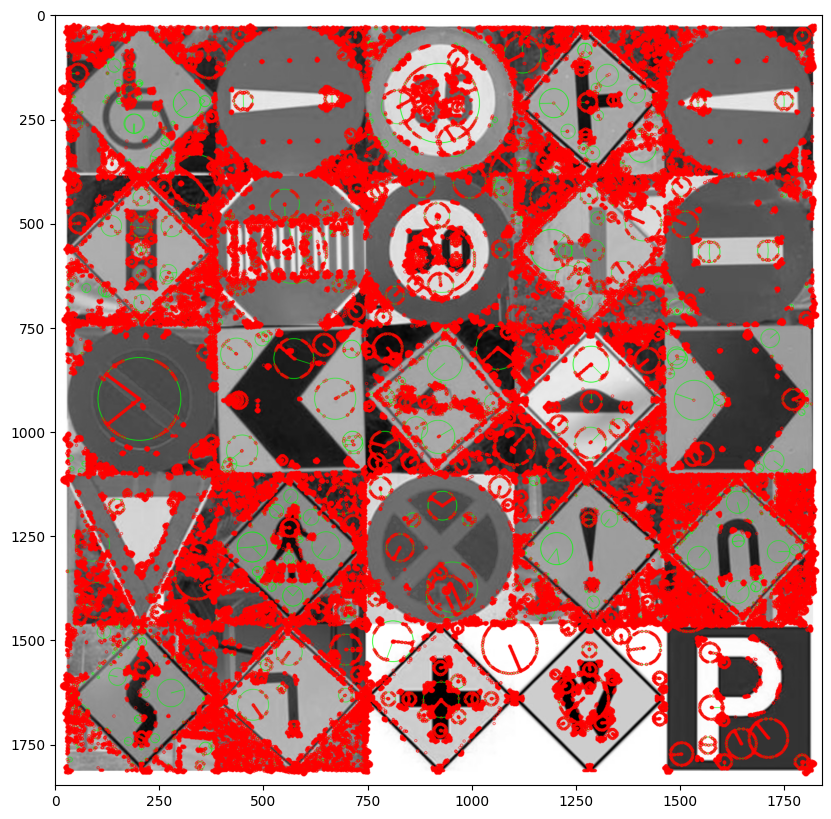

In [11]:
# FAST
fast_img = image
fast = cv2.FastFeatureDetector_create()
#
kp = fast.detect(fast_img, None)
img2 = cv2.drawKeypoints(fast_img, kp, None, color=(255, 0, 0))
plt.imshow(img2)
#
# fast.setNonmaxSuppression(0)
# kp = fast.detect(fast_img, None)
# img3 = cv2.drawKeypoints(fast_img, kp, None, color=(255, 0, 0))
# plt.imshow(img3)
#

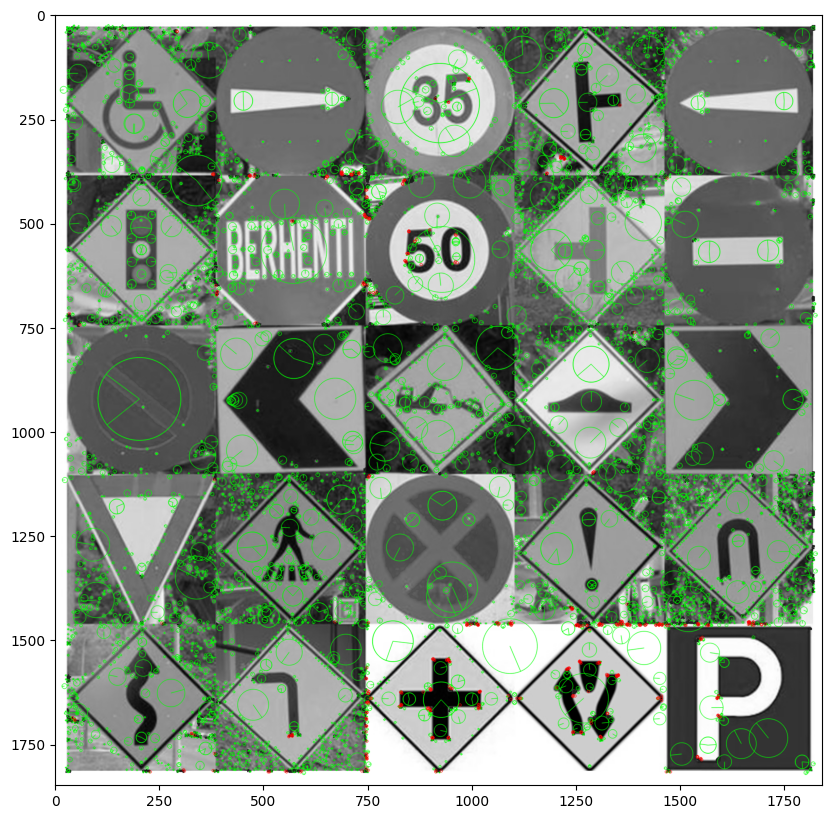

(<matplotlib.image.AxesImage at 0x1860c820510>, None)

In [12]:
# ORB

orb_im = image
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(orb_im, None)
# compute the descriptors with ORB
kp, des = orb.compute(orb_im, kp)
# draw only keypoints location,not size and orientation
orb_im2 = cv2.drawKeypoints(orb_im, kp, None, color=(255, 0, 0), flags=0)
plt.imshow(orb_im2), plt.show()


In [15]:
# b) Proszę spróbować wykryć twarz w sekwencji wideo – nagranej na kamerze lub ściągniętej
#    z serwisu youtube. W tym celu korzystamy z kaskady Ha

face_cascade = cv2.CascadeClassifier("res/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("res/haarcascade_eye.xml")

In [31]:
video = cv2.VideoCapture("res/lab7_3.mp4")
frames = []
while True:
    ret, frame = video.read()
    if not ret:
        break
    frames.append(frame)


In [28]:
def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    # -- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for x, y, w, h in faces:
        center = (x + w // 2, y + h // 2)
        frame = cv2.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y : y + h, x : x + w]
        # -- In each face, detect eyes
        eyes = eye_cascade.detectMultiScale(faceROI)
        for x2, y2, w2, h2 in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0), 4)
    return frame

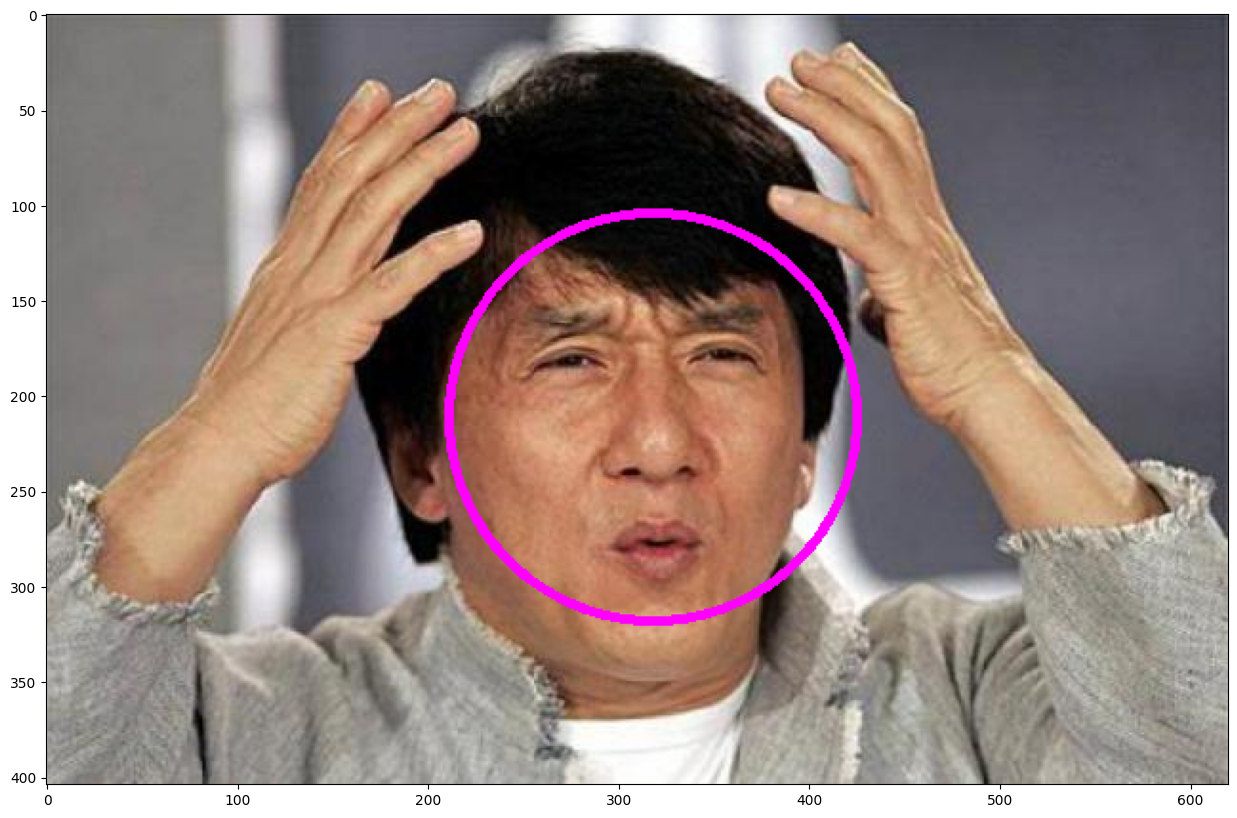

In [29]:
face = cv2.imread("res/lab7_2.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(detectAndDisplay(face))


In [32]:
fourcc = cv2.VideoWriter_fourcc(*"XVID")
output = cv2.VideoWriter("out/diff_face.avi", fourcc, 25.0, (1280, 720))
for frame in frames:
    frame = detectAndDisplay(frame)

    # Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    # ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    # difference[mask != 255] = [0, 0, 255]
    # wyjscie.write(cv2.bitwise_and(frame1, frame1, mask=mask))
    output.write(frame)

output.release()